In [1]:
from sklearn import tree
from dtreeviz.trees import *
from sklearn.datasets import load_boston

boston = load_boston()

X_train = boston.data
y_train = boston.target
testX = X_train[5,:]

regr = tree.DecisionTreeRegressor(max_depth=3)
regr = regr.fit(X_train, y_train)

viz = dtreeviz(regr, X_train, y_train, target_name='price',
               feature_names=boston.feature_names,
               X = testX)
viz

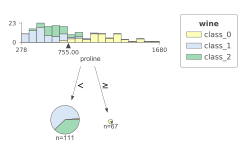

In [2]:
from sklearn.datasets import load_wine

clf = tree.DecisionTreeClassifier(max_depth=1)
wine = load_wine()

clf.fit(wine.data, wine.target)

testX = wine.data[np.random.randint(0, len(wine.data)),:]
testX=None

viz = dtreeviz(clf, wine.data, wine.target, target_name='wine',
              feature_names=wine.feature_names,
              class_names=list(wine.target_names),
              X=testX)
viz

# Single-var regression

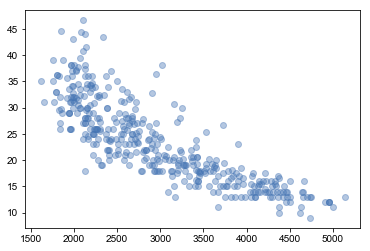

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split

df_cars = pd.read_csv("data/cars.csv")
X = df_cars[['WGT']]
y = df_cars['MPG']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

from matplotlib import rcParams

rcParams['font.family'] = 'Arial'
plt.scatter(X,y,marker='o', alpha=.4, c='#4575b4')

In [4]:
# from dtreeviz.trees import rtreeviz
# rtreeviz(X_train, y_train, max_depth=2, feature_name='Vehicle Weight', target_name='MPG')

In [5]:
from sklearn import linear_model
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)
print(lm.score(X_test,y_test))

0.7353258241054064


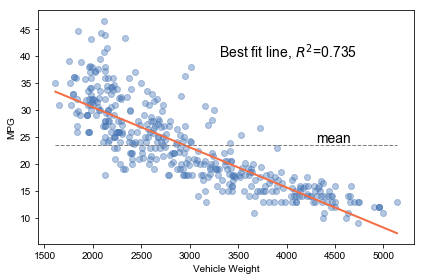

In [6]:
plt.scatter(X,y,marker='o', alpha=.4, c='#4575b4')
overall_feature_range = (np.min(X.values), np.max(X.values))
X_line = np.arange(overall_feature_range[0], overall_feature_range[1], 1).reshape(-1,1)
y_line = lm.predict(X_line)
plt.plot(X_line, y_line, color='#f46d43', lw=2)
plt.plot(overall_feature_range,[np.mean(y),np.mean(y)],'--', color='grey', linewidth=1)
plt.text(3300,40,f"Best fit line, $R^2$={lm.score(X_test,y_test):.3f}", fontsize=14)
plt.text(4300,24,"mean",fontsize=14)
plt.xlabel("Vehicle Weight")
plt.ylabel("MPG")
plt.tight_layout()
plt.savefig("/tmp/linear-model.svg", bbox_inches=0, pad_inches=0)

In [7]:
depth = 4
t = tree.DecisionTreeRegressor(max_depth=depth)
t.fit(X_train,y_train)
t.score(X_test,y_test)

0.6829101247624869

In [8]:
viz = dtreeviz(t, X, y, target_name='MPG', feature_names=['WGT'])
viz

In [9]:
y_range = (min(y), max(y)) # same y axis for all
overall_feature_range = (np.min(X.values), np.max(X.values))

shadow_tree = ShadowDecTree(t, X, y, feature_names=['WGT'])
splits = []
for node in shadow_tree.internal:
    splits.append( node.split() )
splits = sorted(splits)
bins = [overall_feature_range[0]] + splits + [overall_feature_range[1]]
bins

[1613,
 2139.5,
 2152.5,
 2189.5,
 2219.5,
 2332.5,
 2393.0,
 2528.5,
 2912.0,
 2996.5,
 3085.5,
 3431.0,
 3745.0,
 3766.0,
 4361.5,
 4700.0,
 5140]

In [10]:
wgt = X.WGT
means = []
for i in range(len(bins)-1):
    left = bins[i]
    right = bins[i+1]
    inrange = y[(wgt>=left) & (wgt<right)]
    
    means.append( np.mean(inrange) )
means

[32.93243213513513,
 36.59999966666667,
 28.979999900000003,
 32.262500375,
 26.00800016,
 29.855556000000004,
 25.468421157894735,
 25.098387032258064,
 21.973333533333335,
 23.599999875,
 19.742857261904767,
 17.687500125,
 14.0,
 15.328846173076924,
 13.25,
 11.75]

In [11]:
y.values

array([18.      , 15.      , 18.      , 16.      , 17.      , 15.      ,
       14.      , 14.      , 14.      , 15.      , 15.      , 14.      ,
       15.      , 14.      , 24.      , 22.      , 18.      , 21.      ,
       27.      , 26.      , 25.      , 24.      , 25.      , 26.      ,
       21.      , 10.      , 10.      , 11.      ,  9.      , 27.      ,
       28.      , 25.      , 19.      , 16.      , 17.      , 19.      ,
       18.      , 14.      , 14.      , 14.      , 14.      , 12.      ,
       13.      , 13.      , 18.      , 22.      , 19.      , 18.      ,
       23.      , 28.      , 30.      , 30.      , 31.      , 35.      ,
       27.      , 26.      , 24.      , 25.      , 23.      , 20.      ,
       21.      , 13.      , 14.      , 15.      , 14.      , 17.      ,
       11.      , 13.      , 12.      , 13.      , 19.      , 15.      ,
       13.      , 13.      , 14.      , 18.      , 22.      , 21.      ,
       26.      , 22.      , 28.      , 23.      , 

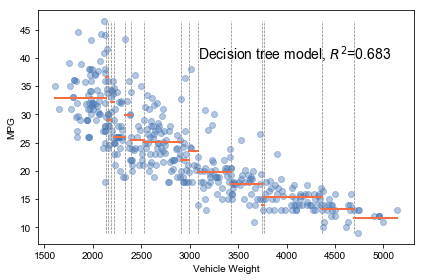

In [12]:
plt.scatter(X,y,marker='o', alpha=.4, c='#4575b4')

for split in splits:
    plt.plot([split,split],[*y_range],'--', color='grey', linewidth=.7)

prevX = overall_feature_range[0]
for i,m in enumerate(means):
    split = overall_feature_range[1]
    if i<len(splits):
        split = splits[i]        
    plt.plot([prevX,split],[m,m],'-', color='#f46d43', linewidth=2)
    prevX = split

plt.text(3090,40,f"Decision tree model, $R^2$={t.score(X_test,y_test):.3f}", fontsize=14)

plt.xlabel("Vehicle Weight")
plt.ylabel("MPG")
plt.tight_layout()
plt.savefig(f"/tmp/dectree-depth-{depth}.svg", bbox_inches=0, pad_inches=0)

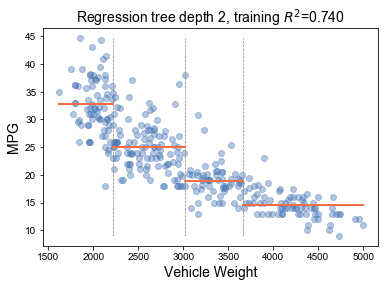

In [13]:
df_cars = pd.read_csv("data/cars.csv")
X = df_cars.drop('MPG', axis=1)
y = df_cars['MPG']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

max_depth = 2
t = rtreeviz(X_train.WGT, y_train,
             max_depth=max_depth,
             feature_name='Vehicle Weight',
             target_name='MPG',
             # x_test=X_test.WGT, y_test=y_test,
             fontsize=14)
plt.savefig(f"/tmp/cars-dectree-depth-{max_depth}.svg", bbox_inches=0, pad_inches=0)

# Try single-var classification

UnboundLocalError: local variable 'mu' referenced before assignment

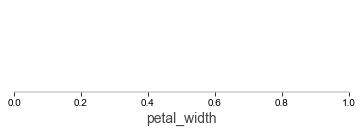

In [14]:
from sklearn.datasets import load_iris

iris = load_iris()
X_train = iris.data
y_train = iris.target
class_names = ["setosa", "versicolor", "virginica"]
petal_width = X_train[:,3]
petal_width

figsize = (6,1.5)
fig, ax = plt.subplots(1, 1, figsize=figsize)

max_depth = 2
ctreeviz_univar(ax, petal_width, y_train, max_depth=max_depth, feature_name = 'petal_width',
         class_names=["setosa", "versicolor", "virginica"],
         gtype='strip',
         nbins=55)
plt.tight_layout()
plt.savefig(f"/tmp/iris-classtree-depth-{max_depth}.svg", bbox_inches=0, pad_inches=0)
plt.show()

In [ ]:
know = pd.read_csv("data/knowledge.csv")
class_names = ['very_low', 'Low', 'Middle', 'High']
know['UNS'] = know['UNS'].map({n: i for i, n in enumerate(class_names)})

max_depth=3
x_train = know.PEG
y_train = know['UNS']
figsize = (6,1.5)
fig, ax = plt.subplots(1, 1, figsize=figsize)
ct = ctreeviz_univar(ax, x_train, y_train, max_depth=max_depth, feature_name = 'PEG', class_names=class_names, nbins=40, gtype='strip')
print( ct.score(x_train.values.reshape(-1,1), y_train) )
plt.tight_layout()
plt.savefig(f"/tmp/knowlege-classtree-depth-{max_depth}.svg", bbox_inches=0, pad_inches=0)
plt.show()

In [ ]:
dtreeviz(ct, x_train.values.reshape(-1,1), y_train, target_name='knowledge',
              feature_names=['PEG'],
              class_names=class_names)